Analyzing Weather Data

In [1]:
#importing necessaries libraries
import pandas as pd   #reading data sets
import matplotlib.pyplot as plt  #visualizing the data sets
import seaborn as sns  #making statistical graphics in python
from sklearn.model_selection import train_test_split   #for splitting dataset into train and test data
#sklearn is a preprocessing library package that is used to transfor the raw data features into useful model
from sklearn.linear_model import LinearRegression #predicts the value of a variable based on the value of another variable.
from sklearn.metrics import mean_squared_error#this is for identifying hhow close the estimate values to the actual values.
from scipy import stats

Loading the Data

In [ ]:
df=pd.read_csv('/content/weather.csv')

In [ ]:
z_scores=stats.zscore(df)

Data Exploration

In [ ]:
print(df.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [ ]:
print(df.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

Data Visualization

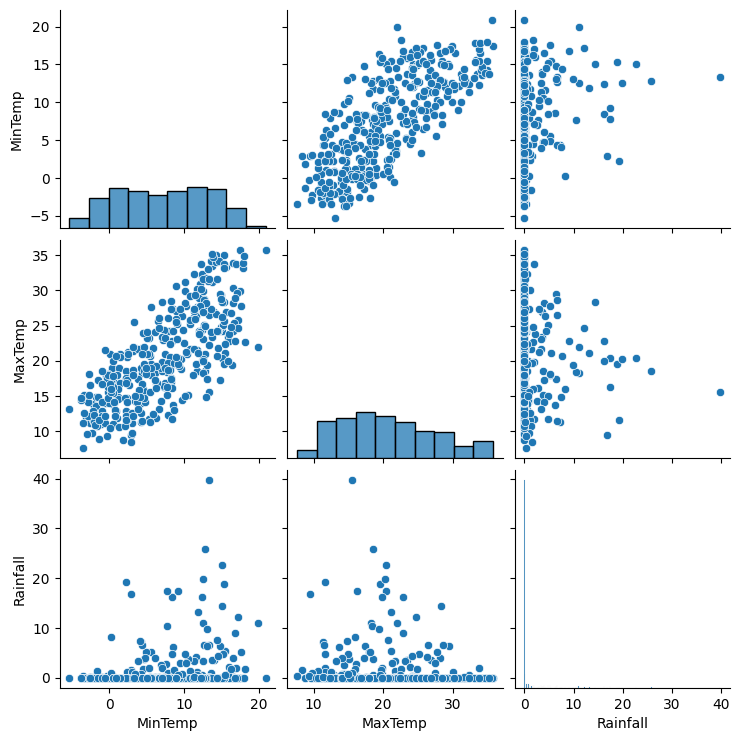

In [ ]:
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

Data Analysis (analyze each term)


In [ ]:
print(df.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


In [ ]:
df['MaxTemp'].value_counts()

14.8    5
20.9    5
12.2    5
15.5    5
11.6    5
       ..
17.1    1
30.3    1
35.8    1
21.2    1
30.7    1
Name: MaxTemp, Length: 187, dtype: int64

In [ ]:
#visualizing
sns.set()

<Axes: xlabel='MaxTemp', ylabel='count'>

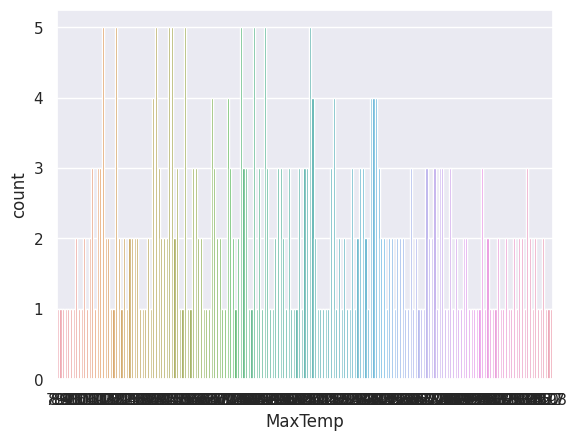

In [ ]:
sns.countplot(x='MaxTemp',data=df)

In [ ]:
df['MinTemp'].value_counts()

0.5     6
4.4     6
15.1    5
3.2     5
2.3     5
       ..
13.9    1
9.5     1
7.7     1
11.4    1
3.3     1
Name: MinTemp, Length: 180, dtype: int64

<Axes: xlabel='MinTemp', ylabel='count'>

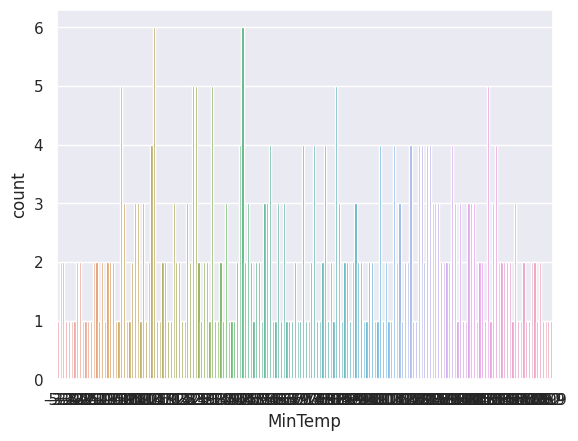

In [ ]:
sns.countplot(x='MinTemp',data=df)

In [ ]:
df['Rainfall'].value_counts()

0.0     263
0.2      17
0.6       6
0.8       5
0.4       5
1.0       4
6.6       3
1.8       3
5.2       3
4.8       3
2.0       3
4.0       3
3.4       3
1.2       3
3.6       2
3.8       2
1.4       2
3.0       2
6.4       2
11.0      2
17.4      2
1.6       2
16.2      2
2.6       1
8.2       1
7.2       1
7.6       1
19.2      1
6.2       1
9.8       1
7.4       1
16.8      1
19.8      1
18.8      1
10.4      1
4.4       1
9.0       1
2.2       1
12.2      1
14.4      1
5.4       1
4.2       1
22.6      1
25.8      1
2.8       1
39.8      1
13.2      1
Name: Rainfall, dtype: int64

<Axes: xlabel='Rainfall', ylabel='count'>

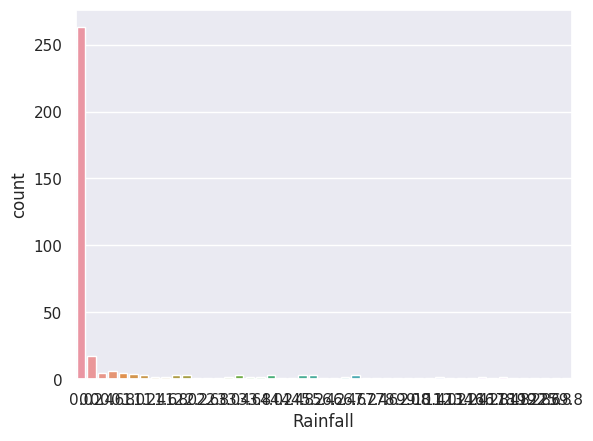

In [ ]:
sns.countplot(x='Rainfall',data=df)

<Axes: xlabel='MaxTemp', ylabel='count'>

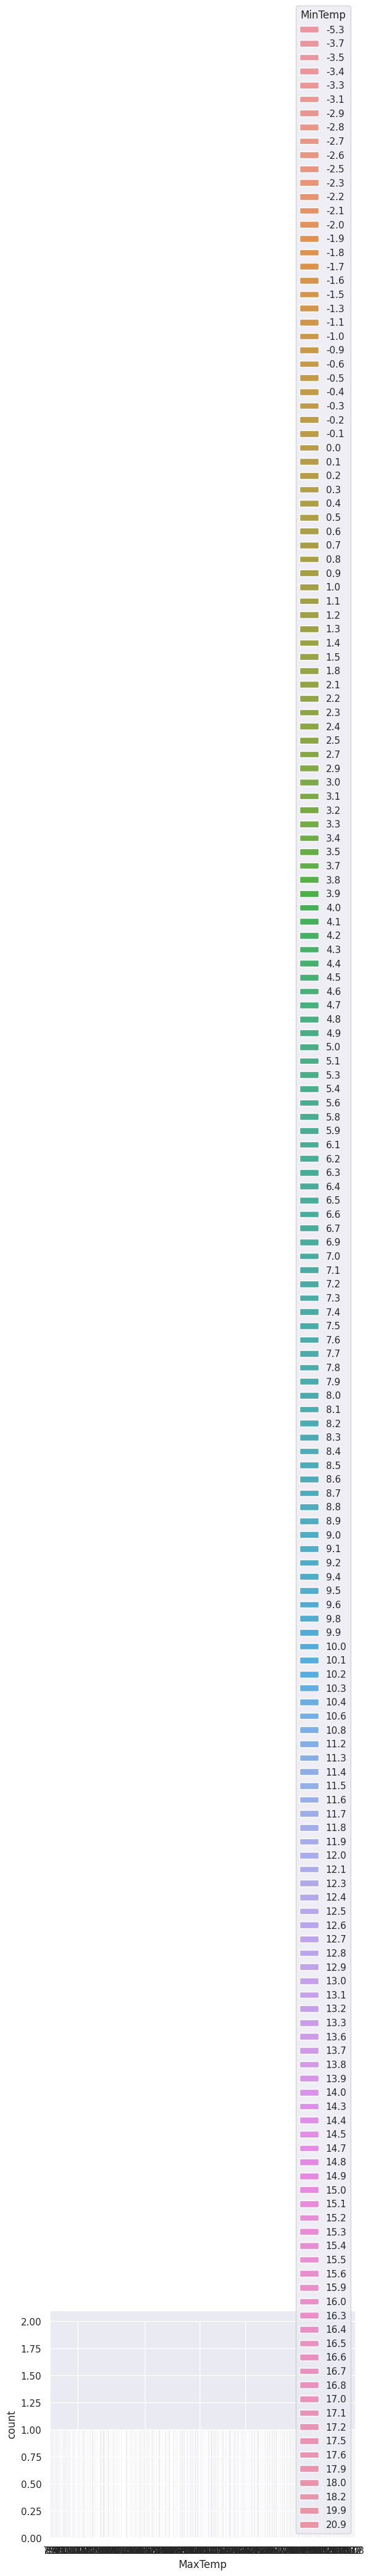

In [ ]:
sns.countplot(x='MaxTemp',hue='Temp3pm',data=df)

predicting

In [ ]:
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 37.0768456005826
